# Diamonds workshop

## Import and prepare the data to work

At first, import libraries and datasets to work

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [147]:
# Import datasets
content = os.listdir('../data/raw_data/')

# With this function I can extract all of datasets in diferent dataframes. In order to understand each dataframe, I will 
# print the name, columns name and shape of each dataframe.
for name_file in content:
    # Split the name file, extract the first part of the string and add '_df'. This will be the dataframe name.
    name_df = name_file.split('.')[0] + '_df'
    # Read csv as dataframe and store the data in a variable called as 'name_df' value
    exec(f'{name_df} = pd.read_csv(f"../data/raw_data/{name_file}", sep=",")')
    # Extract the column names of dataframe
    exec(f'columns_name = {name_df}.columns.values')
    # Extract the shape of dataframe
    exec(f'shape = {name_df}.shape')
    # Print the dataframe name, column names and dataframe shape
    print(name_df,'| column names: ', columns_name, '| df shape: ', shape)

diamonds_city_df | column names:  ['city_id' 'city'] | df shape:  (13, 2)
diamonds_clarity_df | column names:  ['clarity_id' 'clarity'] | df shape:  (8, 2)
diamonds_color_df | column names:  ['color_id' 'color'] | df shape:  (7, 2)
diamonds_cut_df | column names:  ['cut_id' 'cut'] | df shape:  (5, 2)
diamonds_dimensions_df | column names:  ['index_id' 'depth' 'table' 'x' 'y' 'z'] | df shape:  (40455, 6)
diamonds_properties_df | column names:  ['index_id' 'cut_id' 'color_id' 'clarity_id'] | df shape:  (40455, 4)
diamonds_transactional_df | column names:  ['index_id' 'price' 'city_id' 'carat'] | df shape:  (40455, 4)


In order to work with the dataframe, It's necessary to merge all the dataframes in only one:
- Step 1: On one hand, I will merge the 'diamonds_properties_df' dataframe with 'diamonds_cut_df', 'diamonds_color_df' and 'diamonds_clarity_df' dataframe. In that case, the result will be the same number of columns than  'diamonds_properties_df' dataframe.

- Step 2: And on other hand, I will merge 'diamonds_transactional_df' dataframe with 'diamonds_city_df'. In that case, the result will be the same number of columns than  'diamonds_city_df' dataframe.

- Step 3: After that, I will merge the three resulting dataframes (df1, df2 and diamonds_dimensions_df). In the last case, the three dataframes will be the same length so the result should be this length, due to, each row corresponds to one diamont (the 'index_id' is diferent in each row). 

#### Step 1

In [46]:
# Step 1
df1 = pd.merge(diamonds_properties_df , diamonds_cut_df )
df1 = pd.merge(df1 , diamonds_color_df)
df1 = pd.merge(df1 , diamonds_clarity_df)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index_id    40455 non-null  object
 1   cut_id      40455 non-null  object
 2   color_id    40455 non-null  object
 3   clarity_id  40455 non-null  object
 4   cut         40455 non-null  object
 5   color       40455 non-null  object
 6   clarity     40455 non-null  object
dtypes: object(7)
memory usage: 2.2+ MB


#### Step 2

In [49]:
# Step 2
df2 = pd.merge(diamonds_transactional_df, diamonds_city_df)
df2

,index_id,price,city_id,carat,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,89c7286890f7347ab235234e74d406596a127ae3679042...,1.21,Kimberly
1,4fc82b26aecb47d2868c4efbe3581732a3e7cbcc6c2efb...,4284,89c7286890f7347ab235234e74d406596a127ae3679042...,1.02,Kimberly
2,e629fa6598d732768f7c726b4b621285f9c3b85303900a...,6006,89c7286890f7347ab235234e74d406596a127ae3679042...,1.50,Kimberly
3,4523540f1504cd17100c4835e85b7eefd49911580f8eff...,983,89c7286890f7347ab235234e74d406596a127ae3679042...,0.38,Kimberly
4,9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e47...,11078,89c7286890f7347ab235234e74d406596a127ae3679042...,1.53,Kimberly
...,...,...,...,...,...
40450,f4669b5848b66564f2317866860f9334ac63f29de3ed45...,921,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,0.42,Paris
40451,9185c0199efc6aea5b4a97414cd297ead29ad55edec2a7...,540,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,0.30,Paris
40452,fbed8c8d9adc6a3004f597f06166a4b2f4ad8ad948ee87...,7092,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,1.24,Paris
40453,1726e8e229489b353e6007fac1dfffb5300a96bf6166cf...,3710,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,0.71,Paris


#### Step 3

In [50]:
# Step 3: merge of df1, df2 and diamonds_properties_df
df3 = pd.merge(df1, df2)
df3

,index_id,cut_id,color_id,clarity_id,cut,color,clarity,price,city_id,carat,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,Premium,J,VS2,4268,89c7286890f7347ab235234e74d406596a127ae3679042...,1.21,Kimberly
1,5d85be4cc5af40a7cf2c4f0818d92689c185fdea656674...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,Premium,J,VS2,6254,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,1.35,London
2,d2e655334ee2e4841be477484381df1617a8b891adc04c...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,Premium,J,VS2,6157,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,1.36,Madrid
3,759b87b87ba0c0c701d14eb2e6e31560929e9359153781...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,Premium,J,VS2,581,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,0.39,Antwerp
4,a73060afb61efe1b7c817645d00c342df02407f65435a6...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,Premium,J,VS2,4422,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,1.12,Surat
...,...,...,...,...,...,...,...,...,...,...,...
40450,61d4c92ca6621abf129f8e2c01f1cf4fedcc9380b01e1f...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,Ideal,F,IF,886,89c7286890f7347ab235234e74d406596a127ae3679042...,0.30,Kimberly
40451,23b1be035009962fdba37000994ca30645a76738b1da0b...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,Ideal,F,IF,11846,89c7286890f7347ab235234e74d406596a127ae3679042...,1.09,Kimberly
40452,3cd23097df077d65e4f32b3260b959d1e02cb8edfdce18...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,Ideal,F,IF,1439,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,0.41,Las Vegas
40453,894fec21ceb2b6180098a49688b3ab5cdd03837e99d655...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,Ideal,F,IF,760,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,0.27,Tel Aviv


In [57]:
df3 = pd.merge(df3, diamonds_dimensions_df)
df3

,index_id,cut_id,color_id,clarity_id,cut,color,clarity,price,city_id,carat,city,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,Premium,J,VS2,4268,89c7286890f7347ab235234e74d406596a127ae3679042...,1.21,Kimberly,62.4,58.0,6.83,6.79,4.25
1,5d85be4cc5af40a7cf2c4f0818d92689c185fdea656674...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,Premium,J,VS2,6254,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,1.35,London,60.5,56.0,7.19,7.12,4.33
2,d2e655334ee2e4841be477484381df1617a8b891adc04c...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,Premium,J,VS2,6157,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,1.36,Madrid,58.4,59.0,7.40,7.27,4.28
3,759b87b87ba0c0c701d14eb2e6e31560929e9359153781...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,Premium,J,VS2,581,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,0.39,Antwerp,61.3,60.0,4.65,4.68,2.86
4,a73060afb61efe1b7c817645d00c342df02407f65435a6...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,Premium,J,VS2,4422,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,1.12,Surat,58.6,58.0,6.85,6.81,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,61d4c92ca6621abf129f8e2c01f1cf4fedcc9380b01e1f...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,Ideal,F,IF,886,89c7286890f7347ab235234e74d406596a127ae3679042...,0.30,Kimberly,62.0,58.0,4.25,4.30,2.65
40451,23b1be035009962fdba37000994ca30645a76738b1da0b...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,Ideal,F,IF,11846,89c7286890f7347ab235234e74d406596a127ae3679042...,1.09,Kimberly,61.4,55.0,6.61,6.68,4.09
40452,3cd23097df077d65e4f32b3260b959d1e02cb8edfdce18...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,Ideal,F,IF,1439,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,0.41,Las Vegas,61.7,56.0,4.79,4.83,2.97
40453,894fec21ceb2b6180098a49688b3ab5cdd03837e99d655...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,Ideal,F,IF,760,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,0.27,Tel Aviv,63.0,55.0,4.13,4.16,2.61


I have the result, but I would like to delate the columns with '_id' in the column name:

In [58]:
# Create empty list
columns_name = []

# Store in this list the names that doest't 
for column_name in df3.columns:
    if '_id' not in column_name:
        columns_name.append(column_name)
        
diamond_df = df3[columns_name]
diamond_df.head()

,cut,color,clarity,price,carat,city,depth,table,x,y,z
0,Premium,J,VS2,4268,1.21,Kimberly,62.4,58.0,6.83,6.79,4.25
1,Premium,J,VS2,6254,1.35,London,60.5,56.0,7.19,7.12,4.33
2,Premium,J,VS2,6157,1.36,Madrid,58.4,59.0,7.40,7.27,4.28
3,Premium,J,VS2,581,0.39,Antwerp,61.3,60.0,4.65,4.68,2.86
4,Premium,J,VS2,4422,1.12,Surat,58.6,58.0,6.85,6.81,4.00


In [59]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cut      40455 non-null  object 
 1   color    40455 non-null  object 
 2   clarity  40455 non-null  object 
 3   price    40455 non-null  int64  
 4   carat    40455 non-null  float64
 5   city     40455 non-null  object 
 6   depth    40455 non-null  float64
 7   table    40455 non-null  float64
 8   x        40455 non-null  float64
 9   y        40455 non-null  float64
 10  z        40455 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 3.4+ MB


The result is a dataframe with 40455 records with 6 columns with the information to work. The numeric columns are correct and it doesn't include null.

## Plot basic graph to understand the dataframe behavior

It's necessary to plot diferent graphics to understand the dataset. At first, I'll plot the numeric variables, and after that I will present the categoric variables.

#### Numeric variables:

I will represent the numerical variables in different box plots, where the mean of the data is shown. Variables corresponding to the x, y or z dimensions are excluded from this graph. With this you can see how the data behaves and is distributed in each case:

Text(0.5, 1.0, 'Table (mean: "57.4")')

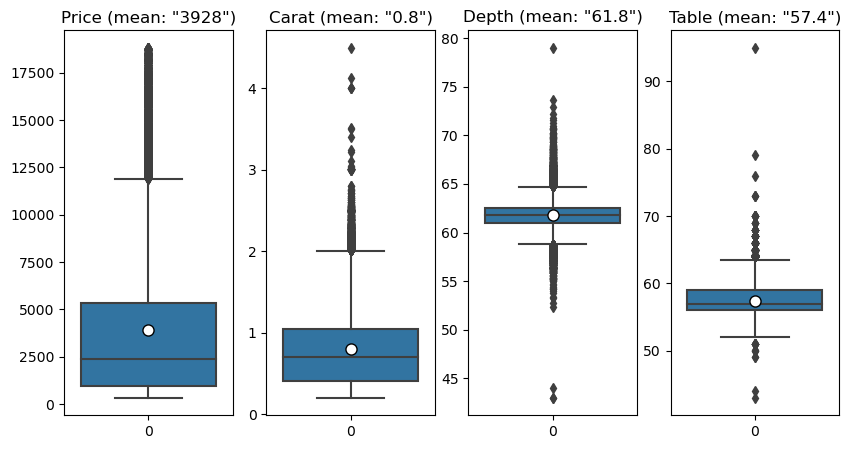

In [87]:
# Create the fig (1x4 dimensions) and axes:
fig, axes = plt.subplots(1, 4, sharex=True, figsize=(10,5))

# Create boxplot for each numeric variable: 
    # Help: The 'showmeans' parameter show the mean of the data. The 'meanprops' customize the marker.
sns.boxplot(data=diamond_df['price'], ax=axes[0], showmeans=True, 
            meanprops={'marker':'o',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
sns.boxplot(data=diamond_df['carat'], ax=axes[1], showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
sns.boxplot(data=diamond_df['depth'], ax=axes[2], showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':'8'})
sns.boxplot(data=diamond_df['table'], ax=axes[3], showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':'8'})

# Add the name of variable with the mean value. In each case, the decimal numeric are different:
axes[0].set_title(f'Price (mean: "{diamond_df["price"].mean().astype(int)}")')
axes[1].set_title(f'Carat (mean: "{diamond_df["carat"].mean().round(2)}")')
axes[2].set_title(f'Depth (mean: "{diamond_df["depth"].mean().round(1)}")')
axes[3].set_title(f'Table (mean: "{diamond_df["table"].mean().round(1)}")')

The price distribution is between 326 and 12,400 dolars. There are outliers up to about 18,000 dolars. Seventy-five percent of the diamonds are below 5500 dolars.

On the other hand, diamonds have up to 2 carats, but it is true that there are outliers up to 4.5 carats. 

#### Categoric variables:

Represent each categorical variable in a histogram by adding the ratio that each bar represents:

In [219]:
def add_ratio(df, column_name, pos1, pos2):
    '''
    _Summary_: Function to add in the graphic the percentage of each bar in the histplot. Graphics with two dimensions 
               subplots
    
    _Input_:
        df (dataframe): is the dataframe use in the graphic.
        column_name (str): is the column name represented in the graphic.
        pos1 (int): in this case, the plot includes 4 subplots. This variable is the 'x' coordinate to select the position 
                    of the subplot.
        pos2 (int): This variable is the 'y' coordinate to select the position of the subplot.
    '''
    
    length = len(df[column_name])   # Calculate the length of the column.
    
    # 'patches' fuction provides a list of all bars in the hist. And with this loop, I will extract each bar of the list.
    for p in axes[pos1, pos2].patches:
        # With that, I can get the height or count of characteristic in this bin.
        height = p.get_height()
        # With this line, I will print the text in the graphic.
        #      l1: x possition of the text. Gets the x position where the bar starts and half the width of the bar.
        #      l2: y possition of the text. Add 0.2 so that the text is placed a little above the edge of the bar.
        #      l3: calculate the ratio with two decimals´and transform in str.
        #      l4: the text will be centered at the specified x position.
        axes[pos1, pos2].text(p.get_x() + p.get_width() / 2.,   # l1
                              height + 0.2,   # l2
                              f'{(height / length):.2f}',   # l3
                              ha="center")   # l4

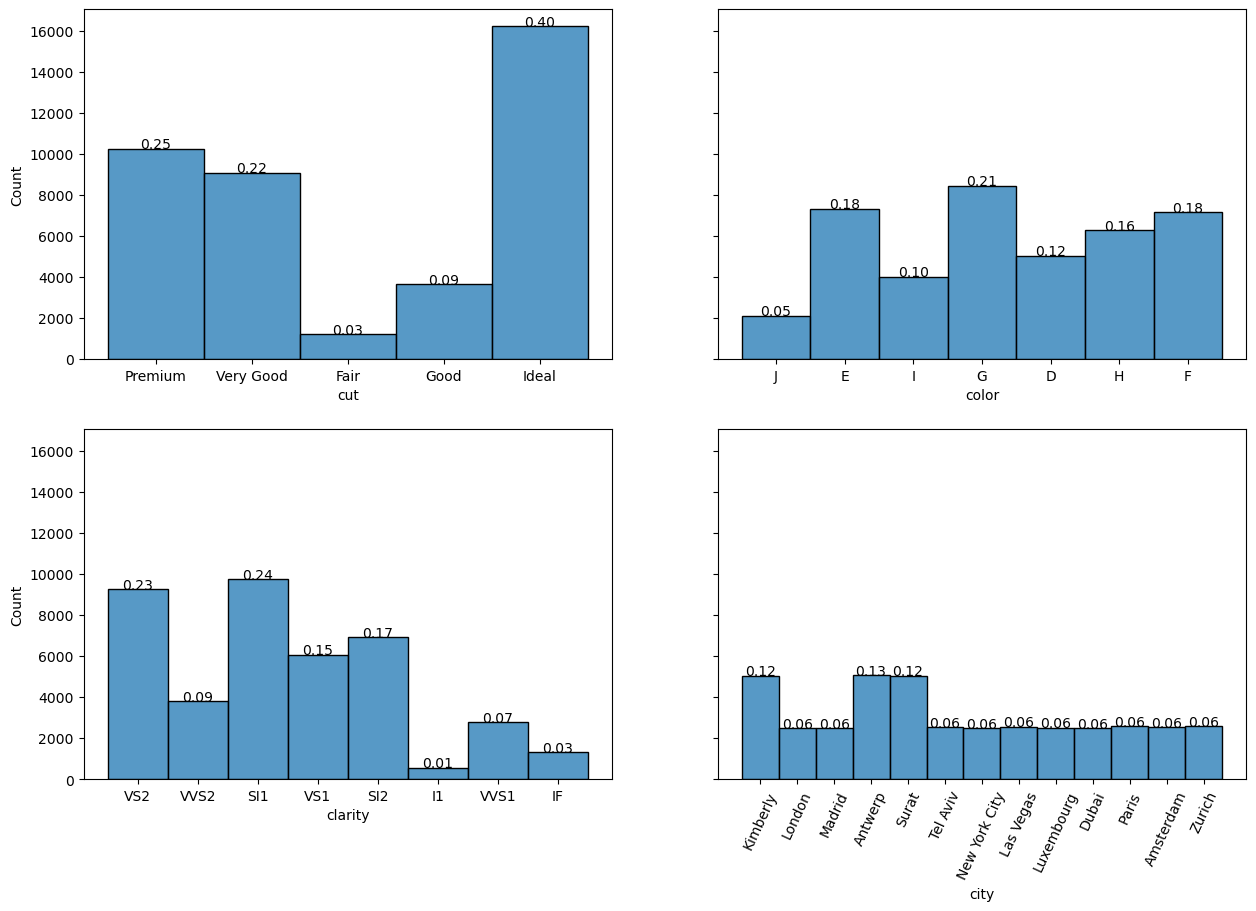

In [220]:
# Create the fig (1x4 dimensions) and axes 
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

# Create histplot for each numeric variable: 
sns.histplot(x=diamond_df['cut'], ax=axes[0,0])   # Plot the hist
add_ratio(diamond_df, 'cut', 0, 0)   # Function to add the ratio in each bin

sns.histplot(x=diamond_df['color'], ax=axes[0,1])
add_ratio(diamond_df, 'color', 0, 1)

sns.histplot(x=diamond_df['clarity'], ax=axes[1,0])
add_ratio(diamond_df, 'clarity', 1, 0)

sns.histplot(x=diamond_df['city'], ax=axes[1,1])
add_ratio(diamond_df, 'city', 1, 1)

plt.xticks(rotation=65)   # Rotate the ticks of the last hist
plt.show()

In [277]:
mode_cut = diamond_df['cut'].mode()
mode_color = diamond_df['color'].mode()
mode_clarity = diamond_df['clarity'].mode()
mode_city = diamond_df['city'].mode()
print('The mode of the cut column is: ', mode_cut[0])
print('The mode of the color column is: ', mode_color[0])
print('The mode of the clarity column is: ', mode_clarity[0])
print('The mode of the city column is: ', mode_city[0])

The mode of the cut column is:  Ideal
The mode of the color column is:  G
The mode of the clarity column is:  SI1
The mode of the city column is:  Antwerp


Plot the distribution of price with each coordinate in scatter plot:

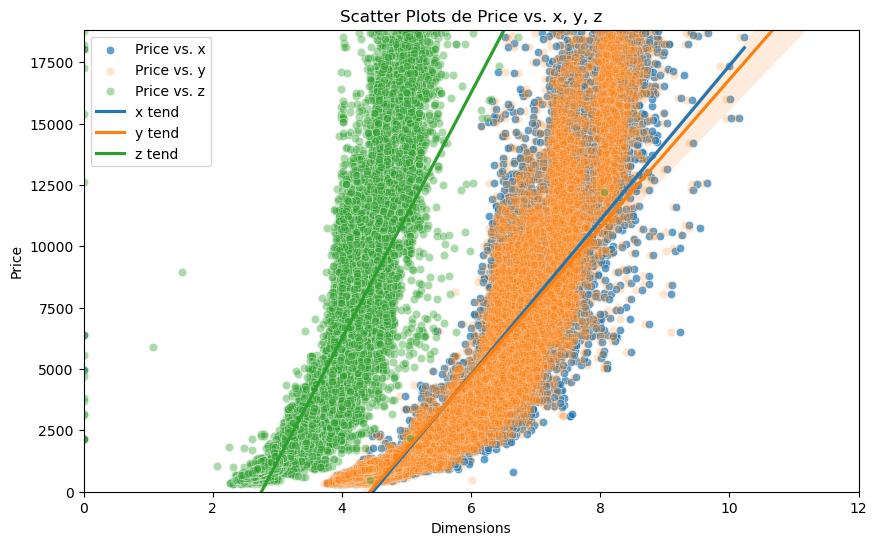

In [127]:
plt.figure(figsize=(10, 6))

# Scatter plot for 'price' vs. 'x'
sns.scatterplot(x='x', y='price', data=diamond_df, label='Price vs. x', alpha=0.7)

# Scatter plot for 'price' vs. 'y'
sns.scatterplot(x='y', y='price', data=diamond_df, label='Price vs. y', alpha=0.2)

# Scatter plot for 'price' vs. 'z'
sns.scatterplot(x='z', y='price', data=diamond_df, label='Price vs. z', alpha=0.4)

# Plot the tend lines for each scatter plot
sns.regplot(x='x', y='price', data=diamond_df, scatter=False, label='x tend')
sns.regplot(x='y', y='price', data=diamond_df, scatter=False, label='y tend')
sns.regplot(x='z', y='price', data=diamond_df, scatter=False, label='z tend')

# Add tags and legend
plt.title('Price vs. x, y, z and tend line')
plt.xlabel('Dimensions')
plt.ylabel('Price')
plt.legend()

# One of the points of the 'prices vs. y' graph is much larger than the rest, so that the graph can be displayed well, I 
# limit with xlim/ylim, the range of data I want it to show.
plt.xlim(0, 12)
plt.ylim(0, 18823)   # 18823 is the highest price

# Mostrar el gráfico
plt.show()

#### Other characteristics

Calculate the correlation between numeric variables:

In [153]:
# Create new dataframe with only numeric variables to calculate the correlation matrix.
diamond_num_var_df = diamond_df[['price', 'carat', 'depth', 'table', 'x', 'y', 'z']]

corr_matrix = diamond_num_var_df.corr()
corr_matrix

,price,carat,depth,table,x,y,z
price,1.000000,0.921935,-0.014864,0.130111,0.885848,0.866163,0.874500
carat,0.921935,1.000000,0.026528,0.183392,0.975688,0.951667,0.967570
depth,-0.014864,0.026528,1.000000,-0.293114,-0.026348,-0.030966,0.094655
table,0.130111,0.183392,-0.293114,1.000000,0.196059,0.184673,0.155189
x,0.885848,0.975688,-0.026348,0.196059,1.000000,0.973712,0.984876
y,0.866163,0.951667,-0.030966,0.184673,0.973712,1.000000,0.964828
z,0.874500,0.967570,0.094655,0.155189,0.984876,0.964828,1.000000


It can be seen in the above graph that the price trend with respect to each of the diamond dimensions is similar. Perhaps, the slope of the regression curve of the z dimension is slightly higher, but the correlation of z (being very similar and high values) is between the correlation of x and y. 

In fact, the correlation between these and the price is quite high and also similar to each other. As expected, there is a slightly higher correlation between diamond dimensions and carat. 

On the other hand, the correlation between table and price is much lower while there is no correlation at all between price and diamond depth. 

*For this reason and to simplify the use case, neither the depth nor the table will be used. Since the first one has no correlation with the price and in the second case the correlation is much lower than the rest of the variables.*

In [179]:
diamond_print = diamond_df[['cut','color','clarity', 'price', 
                            'carat', 'city', 'x', 'y', 'z']]

## Use case

I would like to obtain information to buy a diamond with the best quality/price ratio.
At first, I am going to represent a box diagram to see the price distribution in each city:

In [150]:
# print the city names
diamond_df['city'].unique()

array(['Kimberly', 'London', 'Madrid', 'Antwerp', 'Surat', 'Tel Aviv',
       'New York City', 'Las Vegas', 'Luxembourg', 'Dubai', 'Paris',
       'Amsterdam', 'Zurich'], dtype=object)

In [366]:
# With this function, it is possible to calculate the number of records of each class for a categorical variable. And also 
#represent them in the graph, below each boxplot.
def includes_numbers_sample(df, column_name):
    # Create a series with the unrepeated characteristics of a column and the number of repetitions in each column. 
    city_counts = df[column_name].value_counts().sort_index()  
    
    # With this loop, each name and frequency is included in the corresponding box.
    for city in ax.get_xticklabels():
        x = city.get_position()[0] + 0.05/2   # x position for the label
        y = -200   # y position for the label
        ax.text(x, y, city_counts.loc[city.get_text()], ha='center', va='bottom')   # Create the text

In [ ]:
'''
# Previous function version
def includes_numbers_sample(df, column_name):   
    # Includes the number of diamonds in each group. In this loop, I will extract:
    #       - box: position of each box with ax.patches
    #       - label: the number of records in each group for clarity. 
    # Create a pair box,label for each box with 'zip'.
    for box, label in zip(ax.patches, df[column_name].value_counts().sort_index()):
        x, y = box.get_path().vertices.mean(axis=0)   # Extract the initial position for each box
        x2 = x + 0.25/2   # x position for the label
        y2 = -200   # y position for the label
        ax.text(x2, y2, label, ha='center', va='bottom')   # Create the text
'''        

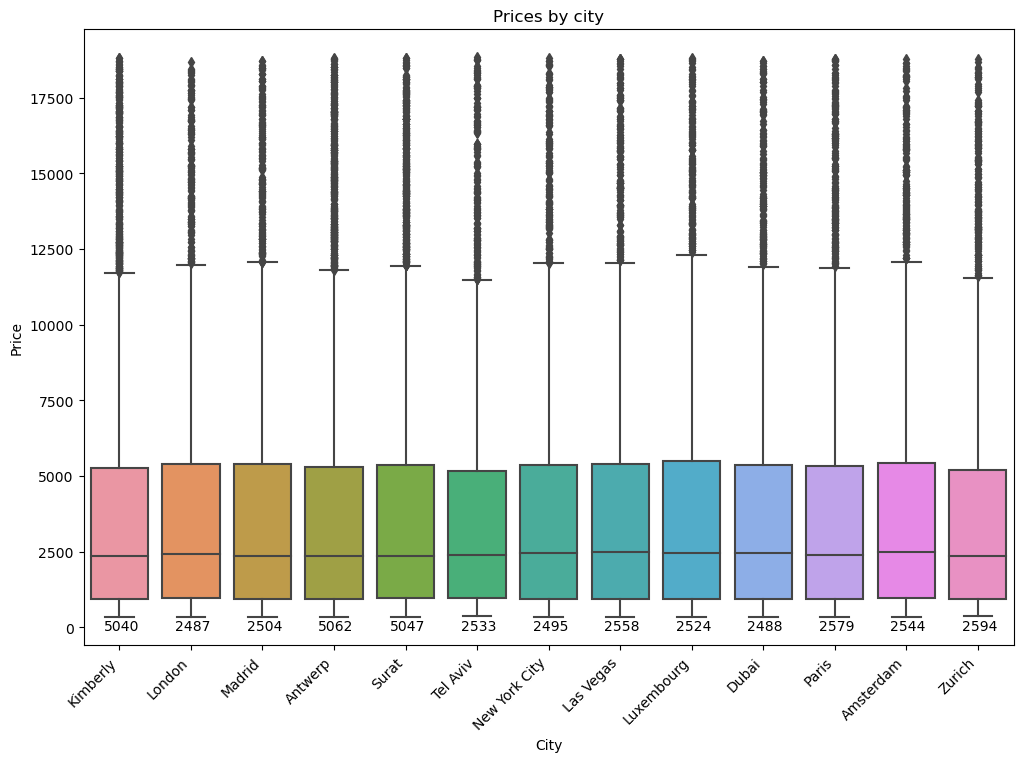

In [367]:
# Create the graph
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='city', y='price', data=diamond_df)

# Includes the number of diamonds in each group.
includes_numbers_sample(diamond_df, 'city')

# Ticks and title
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Prices by city')

# Rotate the ticks
plt.xticks(rotation=45, ha='right')
plt.show()

It can be observed that prices do not vary practically between cities. Since the distribution is very similar in all cases, even the outliers. 

*As I live in Madrid, I am going to go deeper into the data of diamonds sold in Madrid.*

Only diamonds sold in Madrid are selected, since the price distributions are very similar between cities. It is likely that I can find an interesting diamond in Madrid without having to travel to another city and save the trip expenses or spend the difference of the trip on the diamond. 

With the exception of London and Antwerp, where there are records of about 5000 diamonds each, the rest of the cities have similar records, around 2500. Therefore, I think there is enough variety to work only with the data from Madrid and simplify the problem.

In [180]:
# Filter the dataframe only for Madrid.
diamond_madrid = diamond_print.loc[diamond_print['city'] == 'Madrid']
diamond_madrid.head()

,cut,color,clarity,price,carat,city,x,y,z
2,Premium,J,VS2,6157,1.36,Madrid,7.40,7.27,4.28
39,Premium,J,VS2,450,0.33,Madrid,4.53,4.49,2.69
43,Premium,J,VS2,3535,1.01,Madrid,6.47,6.43,3.86
62,Premium,J,VS2,7553,1.51,Madrid,7.20,7.17,4.51
63,Premium,J,VS2,3190,1.01,Madrid,6.45,6.35,3.99


I would to like plot the carat vs. price:

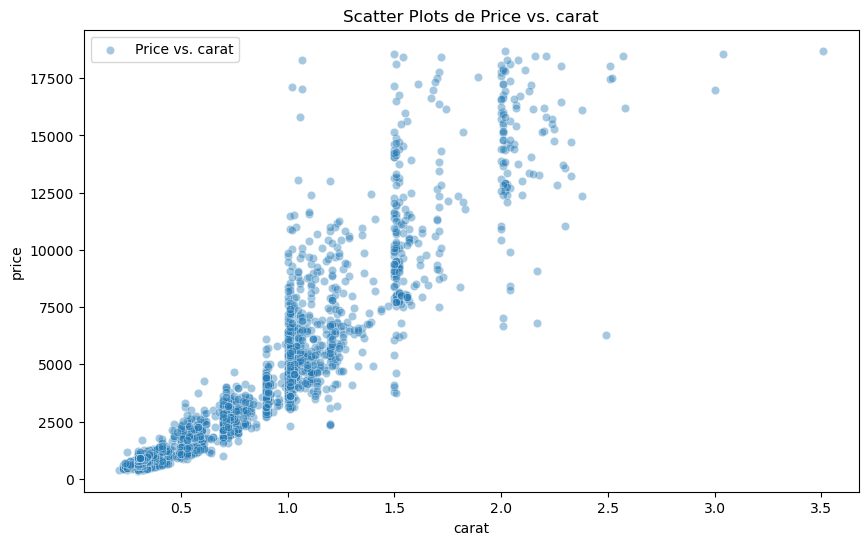

In [301]:
plt.figure(figsize=(10, 6))

# Scatter plot for 'price' vs. 'carat'
sns.scatterplot(x='carat', y='price', data=diamond_madrid, label='Price vs. carat', alpha=0.4)

# Add tags and legend
plt.title('Scatter Plots de Price vs. carat')
plt.show()

It can be intuited as there are diamonds with certain carats that may be more standard than others, because they are grouped more for example in 0.5, 0.75, 1, 1.25, 1.5 or 2.

The quality of diamonds is valued according to the 4C's: cut, color, clarity and carat. 

First we represent the price distribution for each type of cut. I have considered that the order in which the boxplot is placed from left to right has higher quality according to this characteristic of the diamond.

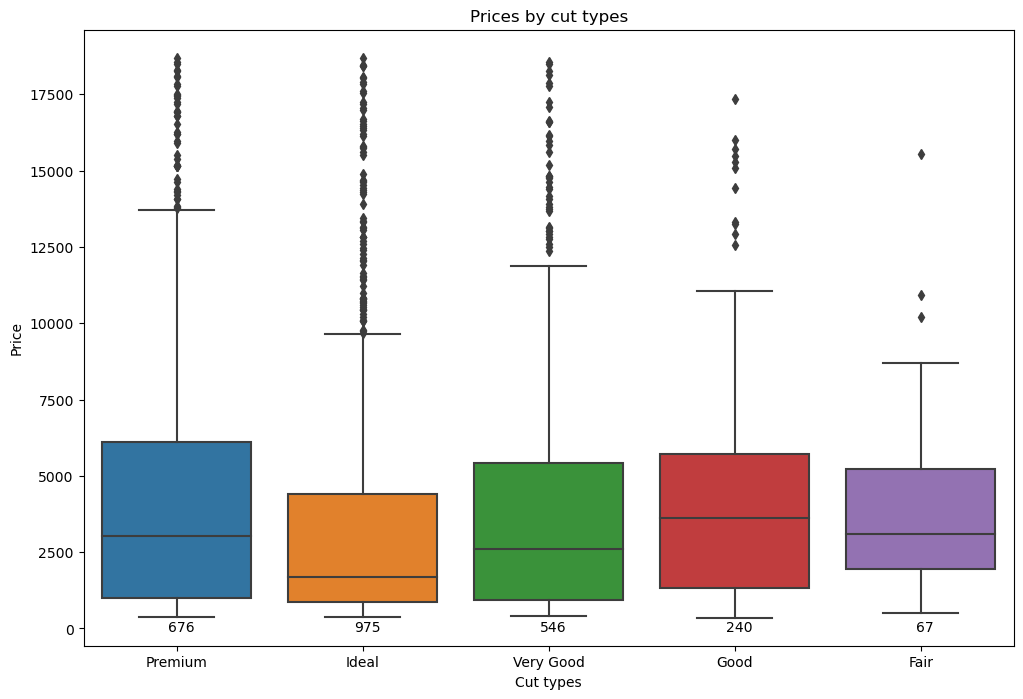

In [368]:
# Create the graph for cut types
new_order = ['Premium', 'Ideal', 'Very Good', 'Good', 'Fair']   # Sort the box plot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='cut', y='price', data=diamond_madrid, order=new_order)

# Includes the number of diamonds in each group.
includes_numbers_sample(diamond_madrid, 'cut')

# Ticks and title
plt.xlabel('Cut types')
plt.ylabel('Price')
plt.title('Prices by cut types')
plt.show()

It can be seen how the distributions are diderent, although there are no disproportionate differences in the iqr. The median values are similar, except for the 'ideal' cut where it is somewhat lower. It should be noted that in the case of premium cut diamonds the iqr is the highest and the whiskers also, but it is the one with the lowest number of registers, so in this case there is much more price disparity between diamonds of this type.

Whereas Fair cut diamonds, are all comprised in a much smaller price range. This behavior follows the logic that could be intuited in previous graphs.

Below we can see the price distribution according to the different colors. As in the previous case, they are placed from left to right according to the transparency of the glass:
- D-F: colorless
- G-J: almost colorless

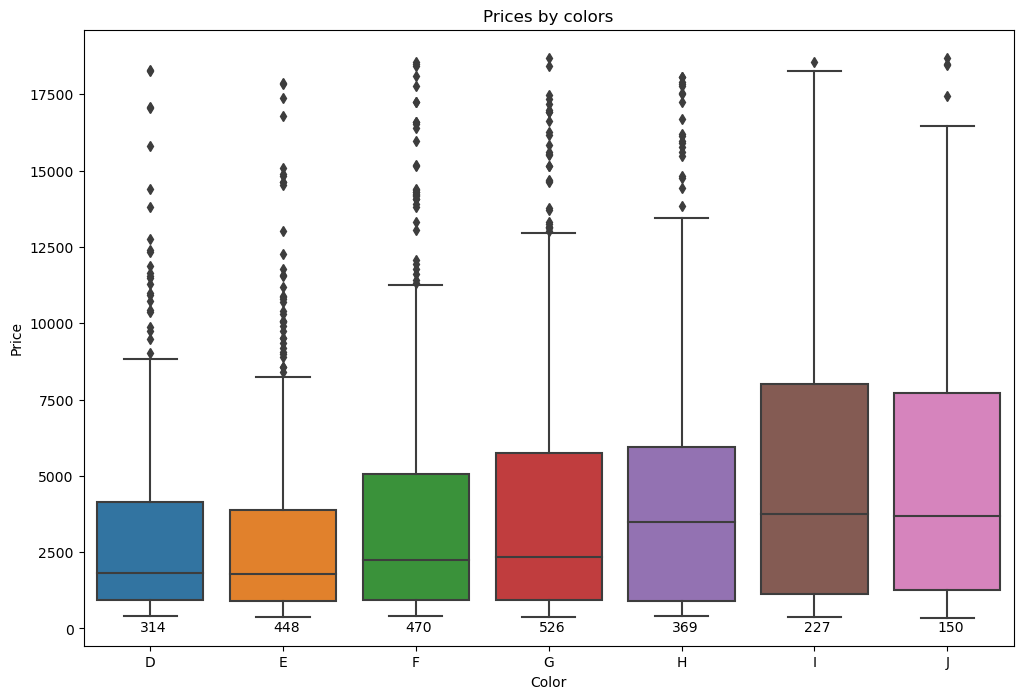

In [369]:
# Create the graph for colors
new_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']   # Sort the box plot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='color', y='price', data=diamond_madrid, order=new_order)

# Includes the number of diamonds in each group.
includes_numbers_sample(diamond_madrid, 'color')

# Ticks and title
plt.xlabel('Color')
plt.ylabel('Price')
plt.title('Prices by colors')
plt.show()

I am surprised that there is more price variety in diamonds that are 'almost transparent' like the I or J. But from this perhaps, one could deduce, that color obviously matters in the price of the diamond, but perhaps the most determining characteristic. For if this were so, the price distribution of 'D' diamonds would be either wider or higher. 

The price of diamonds is also represented with respect to the clarity of the diamonds. As in the previous charts, they are ordered from left to right, from highest quality to lowest (according to this characteristic). This characteristic indicates the amount of defects in the diamond:
- IF - Internally Flawless: no internal inclusions visible to an expert with a 10x magnification magnifier.
- VVS1 - Very Very Small Inclusions (grade 1): a tiny inclusion visible to an expert with a 10x magnification magnifier.
- VVS2 - Very Very Small Inclusions (grade 2): several tiny inclusions visible to an expert with a 10x magnification     magnifier.
- VS1 - Very Small Inclusions (grade 1): a very small inclusion visible with a 10x magnification magnifier.
- VS2 - Very Small Inclusions (grade 2): several very small inclusions visible with a 10x magnification magnifier.
- SI1 - Small Inclusions (grade 1): a small inclusion visible with a 10x magnification magnifier.
- SI2 - Small Inclusions (grade 2): several small inclusions visible with a 10x magnification magnifier.
- I1 - Included (grade 1): inclusion that is visible to the naked eye.

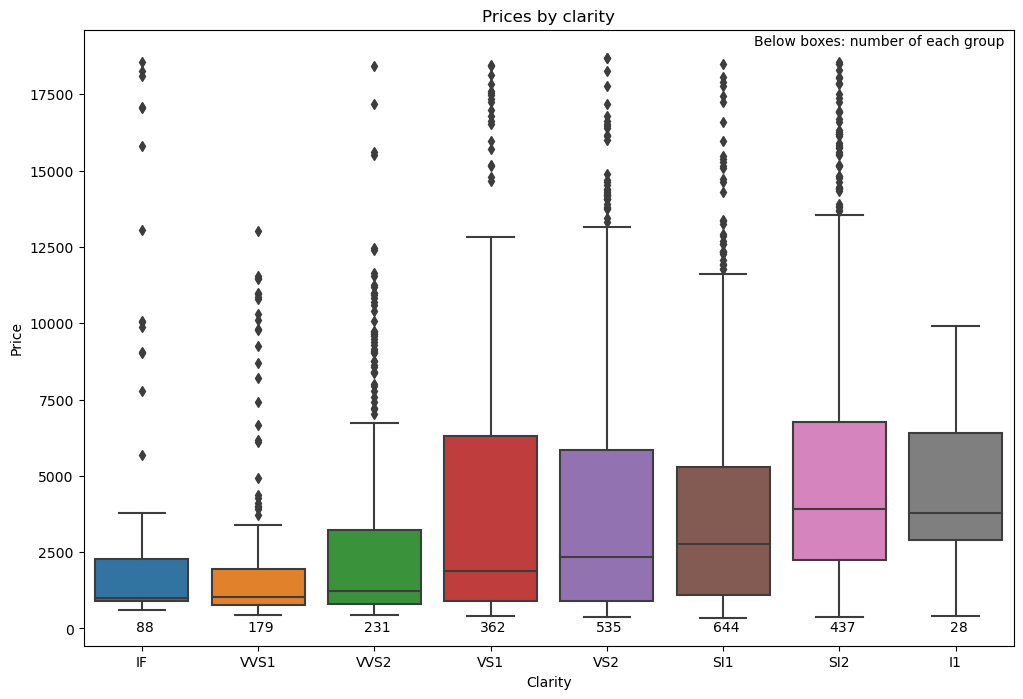

In [371]:
# Create the graph for clarity
new_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2','I1']   # Sort the box plot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='clarity', y='price', data=diamond_madrid, order=new_order)

# Includes the number of diamonds in each group.
includes_numbers_sample(diamond_madrid, 'clarity')
# Text to explain the meaning of the numbers under each box.
corner_text = 'Below boxes: number of each group'
plt.text(0.99, 0.97, corner_text, ha='right', va='bottom', transform=ax.transAxes)

# Ticks and title
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.title('Prices by clarity')
    
plt.show()

In this case, there is a similar behavior to the previous one. For diamonds that have a higher number of defects have wider and higher price ranges than for diamonds with fewer defects. It is true, that in this graph, there are very few 'IF' or 'VVS1' diamonds with respect to other classes.

Looking at the graphs, it seems that the characteristic that can influence the price the most is the number of carats. We have not plotted the relationship of price to size for this dataframe, since carat and diamond size are closely related. This could be seen in the correlation matrix, in addition to the fact that both depth and x, y, and z are parameters that are used for the carat calculation.

#### Conclusion

When choosing a diamond, the price of diamonds is more dependent on carats than on other characteristics. Let's look at the other characteristics to decide which diamond to buy. Trying to have a minimum carat.

If we look at the highest quality indicators separately:
- Premium cut diamonds: there are 676 that meet this condition.
- D color diamonds: there are 314 that meet this condition.
- IF clarity diamonds: there are 88 that meet this condition.

Si filtro solo por los criterios de corte, color y claridad:

In [422]:
# Filter the dataframe by clarity=IF, cut=premium and color=D
test = diamond_madrid.loc[
    (diamond_madrid['cut'].isin(['Premium'])) &
    (diamond_madrid['color'].isin(['D'])) &
    (diamond_madrid['clarity'].isin(['IF']))
]
test

,cut,color,clarity,price,carat,city,x,y,z
39882,Premium,D,IF,18279,1.07,Madrid,6.67,6.57,4.03
39885,Premium,D,IF,1208,0.30,Madrid,4.29,4.27,2.66


I get only two diamonds that meet this condition, one with a very high price (but it is not very big) and one with a very low price (with very few carats, so it will be very small).

I'm going to remove the outliers in the price column. And after that, I am going to select diamonds with carats between 1 and 2, which I think there may be interesting options with a "reasonable" price. 

In [402]:
# Function to obtain and delete the outliers to the dataframe
def find_outliers_iqr(df, column_name):
    # Column to calculate
    df_column = df[column_name]
    
    # Quartiles calculations
    q1=df_column.quantile(0.25)
    q3=df_column.quantile(0.75)
    iqr=q3-q1
    
    # Obtain outliers and non_outliers dataframe
    #outliers_df = df[((df_column<(q1-1.5*iqr)) | (df_column>(q3+1.5*iqr)))]
    not_outliers_df = df[((df_column>(q1-1.5*iqr)) & (df_column<(q3+1.5*iqr)))]
    
    return not_outliers_df

In [424]:
# Remove the outliers
diamond_madrid_out = find_outliers_iqr(diamond_madrid, 'price')
# Filter diamonds from 1 to 2 carats
diamond_filter1 = diamond_madrid_out.loc[
    (diamond_madrid_out['carat'] >=1) &
    (diamond_madrid_out['carat'] <=2)]
# Sort the dataframe
df_sort1 = diamond_filter1.sort_values(by='carat', ascending=False)
df_sort1.head()

,cut,color,clarity,price,carat,city,x,y,z
34058,Fair,H,SI2,10913,2.00,Madrid,7.67,7.58,5.18
31990,Good,G,SI2,11041,2.00,Madrid,8.30,8.27,4.81
31985,Good,G,SI2,10416,2.00,Madrid,7.87,7.83,5.05
21956,Very Good,F,SI1,11782,1.83,Madrid,7.78,7.73,4.90
13361,Fair,J,SI1,8362,1.81,Madrid,8.14,8.09,4.56


I will filter the resulting diamonds using new criteria to narrow the search:
- There are 5 cut types, so I will select the two best: premium or ideal.
- There are 7 colors available, but they can be grouped into 2. I will select the one in group D-F (considered transparent).
- There are 5 levels with sub-grades of diamond clarity. I will select the first two levels: IF, VVS1, VVS2.
I believe that with these criteria I can select a very good diamond.

In [430]:
# Filter the dataframe by IF clarity
diamond_filter2 = diamond_filter1.loc[
    (diamond_filter1['cut'].isin(['Premium', 'Ideal'])) &
    (diamond_filter1['color'].isin(['D', 'E', 'F'])) &
    (diamond_filter1['clarity'].isin(['IF', 'VVS1', 'VVS2']))
]
df_sort2 = diamond_filter2.sort_values(by='carat', ascending=False).reset_index()
df_sort2

,index,cut,color,clarity,price,carat,city,x,y,z
0,9974,Ideal,E,VVS2,10703,1.14,Madrid,6.71,6.68,4.17
1,39047,Ideal,F,VVS1,9259,1.14,Madrid,6.71,6.76,4.15
2,12730,Ideal,F,VVS2,9634,1.12,Madrid,6.69,6.66,4.10
3,12329,Premium,F,VVS2,9377,1.11,Madrid,6.79,6.82,4.03
4,9422,Premium,E,VVS2,10387,1.10,Madrid,6.69,6.76,4.04
5,11690,Ideal,D,VVS2,11550,1.10,Madrid,6.58,6.54,4.08
6,11727,Ideal,D,VVS2,11654,1.10,Madrid,6.58,6.54,4.08
7,12967,Ideal,F,VVS2,10061,1.07,Madrid,6.56,6.58,4.09
8,12726,Ideal,F,VVS2,8619,1.06,Madrid,6.57,6.62,4.03
9,12717,Ideal,F,VVS2,9092,1.05,Madrid,6.52,6.55,4.06


Of these, I will select the one with the lowest price (7204 dolares), as it has 1 carat, premium cut, color F and VVS2. I consider it a very good choice and with a "reasonable" price. 